In [1]:
import sklearn
print(sklearn.__version__)

1.2.2


In [2]:
from sklearn.feature_selection import RFE
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/training_preproc_dataframe_norm_peak_max.csv', index_col=[0])

In [4]:
from sklearn.model_selection import train_test_split

y = df.iloc[:,-1].values
X = df.iloc[:,0:-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [5]:
print(X.shape, y.shape)

(72475, 2581) (72475,)


In [6]:
from sklearn.tree import DecisionTreeClassifier

# define the method
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20, verbose=1)
# fit the model
rfe.fit(X_train[0:1000, 0:1581], y_train[0:1000])


Fitting estimator with 1581 features.
Fitting estimator with 1580 features.
Fitting estimator with 1579 features.
Fitting estimator with 1578 features.
Fitting estimator with 1577 features.
Fitting estimator with 1576 features.
Fitting estimator with 1575 features.
Fitting estimator with 1574 features.
Fitting estimator with 1573 features.
Fitting estimator with 1572 features.
Fitting estimator with 1571 features.
Fitting estimator with 1570 features.
Fitting estimator with 1569 features.
Fitting estimator with 1568 features.
Fitting estimator with 1567 features.
Fitting estimator with 1566 features.
Fitting estimator with 1565 features.
Fitting estimator with 1564 features.
Fitting estimator with 1563 features.
Fitting estimator with 1562 features.
Fitting estimator with 1561 features.
Fitting estimator with 1560 features.
Fitting estimator with 1559 features.
Fitting estimator with 1558 features.
Fitting estimator with 1557 features.
Fitting estimator with 1556 features.
Fitting esti

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20, verbose=1)

In [7]:
# transform the data
X_train_t = rfe.transform(X_train[0:1000, 0:1581])
X_test_t = rfe.transform(X_test[:,0:1581])

In [8]:
print(X_train_t.shape)

(1000, 20)


In [ ]:
X =

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn40 = KNeighborsClassifier(n_neighbors=40)

knn40.fit(X_train_t, y_train[0:1000])
y_pred = knn40.predict(X_test_t)
y_pred_train = knn40.predict(X_train_t)
scores = cross_val_score(knn40, X_train_t, y_train[0:1000], cv=5)
scores = scores.tolist()

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("precision: ", metrics.precision_score(y_train[0:1000], y_pred_train)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train[0:1000], y_pred_train)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_train[0:1000], y_pred_train)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_train[0:1000], y_pred_train)) # (tp+tn)/m

print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

[[12929  1708]
 [  599  8681]]
***RESULTS ON TRAIN SET***
precision:  0.8428246013667426
recall:  0.925
f1_score:  0.8820023837902266
accuracy:  0.901
***RESULTS ON TEST SET***
precision:  0.8355953412262971
recall:  0.9354525862068965
f1_score:  0.8827088311556256
accuracy:  0.903541414056947


In [14]:
from sklearn.naive_bayes import GaussianNB

NaiveB = GaussianNB()

NaiveB.fit(X_train_t, y_train[0:1000])
y_pred = NaiveB.predict(X_test_t)
y_pred_train = NaiveB.predict(X_train_t)
scores.append(cross_val_score(NaiveB, X_train_t, y_train[0:1000], cv=5))

print('***RESULTS ON TRAIN SET***')
print("precision: ", metrics.precision_score(y_train[0:1000], y_pred_train)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train[0:1000], y_pred_train)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_train[0:1000], y_pred_train)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_train[0:1000], y_pred_train)) # (tp+tn)/m

print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m


***RESULTS ON TRAIN SET***
precision:  0.6942003514938488
recall:  0.9875
f1_score:  0.8152734778121775
accuracy:  0.821
***RESULTS ON TEST SET***
precision:  0.6703085781780599
recall:  0.978448275862069
f1_score:  0.7955839831770787
accuracy:  0.8049086423882594


In [15]:
from sklearn.tree import DecisionTreeClassifier

DecTree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=2)

DecTree.fit(X_train_t, y_train[0:1000])
y_pred_train = DecTree.predict(X_train_t)
y_pred = DecTree.predict(X_test_t)
scores.append(cross_val_score(DecTree, X_train_t, y_train[0:1000], cv=5))


print('***RESULTS ON TRAIN SET***')
print("precision: ", metrics.precision_score(y_train[0:1000], y_pred_train)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train[0:1000], y_pred_train)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_train[0:1000], y_pred_train)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_train[0:1000], y_pred_train)) # (tp+tn)/m

print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

***RESULTS ON TRAIN SET***
precision:  0.9974554707379135
recall:  0.98
f1_score:  0.9886506935687264
accuracy:  0.991
***RESULTS ON TEST SET***
precision:  0.8822711719418306
recall:  0.8891163793103448
f1_score:  0.8856805495920996
accuracy:  0.910942007776895


In [16]:

from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=30, criterion='entropy', max_depth=6, min_samples_split=4, min_samples_leaf=2)

rand_forest.fit(X_train_t, y_train[0:1000])
y_pred_train = rand_forest.predict(X_train_t)
y_pred = rand_forest.predict(X_test_t)
scores.append(cross_val_score(rand_forest, X_train_t, y_train[0:1000], cv=5))

print('***RESULTS ON TRAIN SET***')
print("precision: ", metrics.precision_score(y_train[0:1000], y_pred_train)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train[0:1000], y_pred_train)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_train[0:1000], y_pred_train)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_train[0:1000], y_pred_train)) # (tp+tn)/m

print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m


***RESULTS ON TRAIN SET***
precision:  0.9900249376558603
recall:  0.9925
f1_score:  0.9912609238451936
accuracy:  0.993
***RESULTS ON TEST SET***
precision:  0.9384960958391272
recall:  0.9454741379310345
f1_score:  0.941972193891245
accuracy:  0.9548020236651754


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(C=10, solver='lbfgs', max_iter=300000)

LogReg.fit(X_train_t, y_train[0:1000])
y_pred_train = LogReg.predict(X_train_t)
y_pred = LogReg.predict(X_test_t)
scores.append(cross_val_score(LogReg, X_train_t, y_train[0:1000], cv=5))

print('***RESULTS ON TRAIN SET***')
print("precision: ", metrics.precision_score(y_train[0:1000], y_pred_train)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train[0:1000], y_pred_train)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_train[0:1000], y_pred_train)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_train[0:1000], y_pred_train)) # (tp+tn)/m

print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

***RESULTS ON TRAIN SET***
precision:  0.9478908188585607
recall:  0.955
f1_score:  0.9514321295143212
accuracy:  0.961
***RESULTS ON TEST SET***
precision:  0.9212146509443807
recall:  0.9512931034482759
f1_score:  0.9360122992100939
accuracy:  0.9495338044069073


In [18]:
from sklearn.svm import SVC

svm = SVC(kernel='linear',C=1)

svm.fit(X_train_t, y_train[0:1000])
y_pred_train = svm.predict(X_train_t)
y_pred = svm.predict(X_test_t)
scores.append(cross_val_score(svm, X_train_t, y_train[0:1000], cv=5))

print('***RESULTS ON TRAIN SET***')
print("precision: ", metrics.precision_score(y_train[0:1000], y_pred_train)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train[0:1000], y_pred_train)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_train[0:1000], y_pred_train)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_train[0:1000], y_pred_train)) # (tp+tn)/m

print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

***RESULTS ON TRAIN SET***
precision:  0.9331683168316832
recall:  0.9425
f1_score:  0.9378109452736318
accuracy:  0.95
***RESULTS ON TEST SET***
precision:  0.8983973700431477
recall:  0.9423491379310345
f1_score:  0.9198485326601452
accuracy:  0.9362796337333278


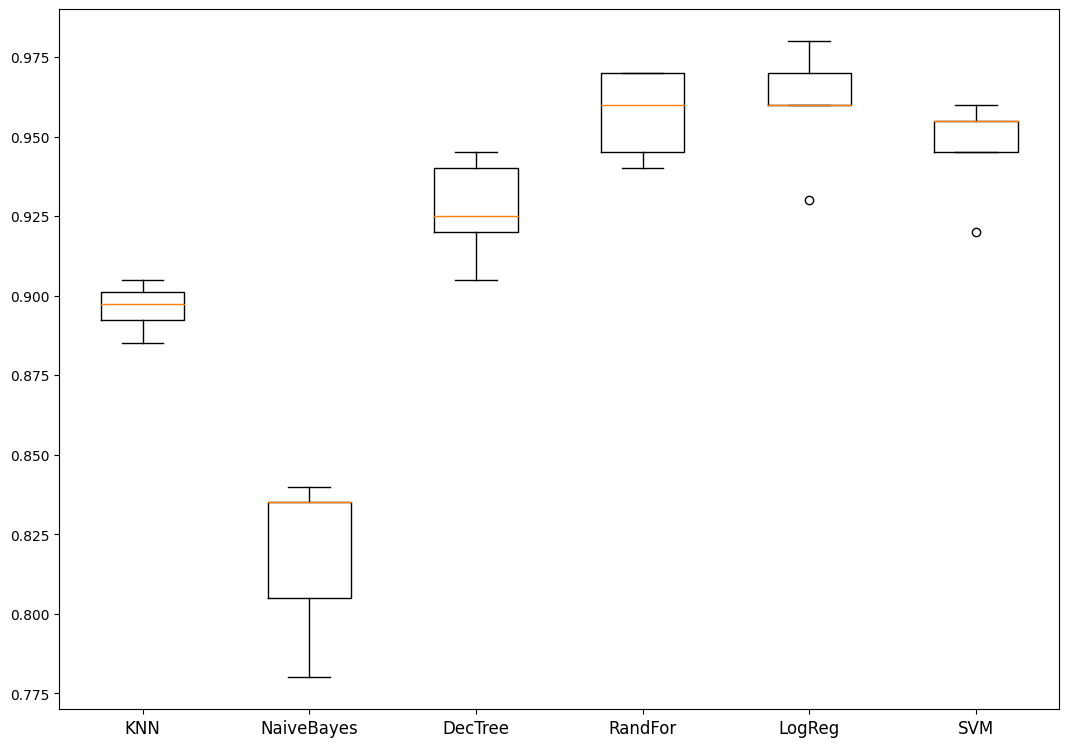

In [19]:
data = [np.array(scores[0:4]), scores[5], scores[6], scores[7], scores[8], scores[9]]
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

ax.set_xticklabels(['KNN', 'NaiveBayes',
                    'DecTree', 'RandFor',
                    'LogReg', 'SVM'])
plt.xticks(fontsize=12)

# show plot
plt.show()

In [20]:
df = pd.read_csv('/content/drive/MyDrive/dataframe_preproc_peakmax_mix.csv', index_col=[0])

In [22]:
x_mix = df.iloc[:,0:1581]
x_t = rfe.transform(x_mix)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RFE was fitted without feature names
  warnings.warn(


In [23]:
pred_knn = knn40.predict(x_t)
pred_naiveb = NaiveB.predict(x_t)
pred_dectree = DecTree.predict(x_t)
pred_randfor = rand_forest.predict(x_t)
pred_logreg = LogReg.predict(x_t)
pred_svm = svm.predict(x_t)

In [25]:
!pip install pyimzml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 875.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wheezy.template: filename=wheezy.template-3.2.0-cp310-cp310-linux_x86_64.whl size=2501856 sha256=dd601f5d0ee8e3088e54c55ba7c482bfcdf3ce0bc2b27c502c80d151c35fcad6
  Stored in directory: /root/.cache/pip/wheels/8d/5c/d9/6b088a4ef28a812020a60c400216c500d1b8fd20fd2b8d9d1f
Successfully built wheezy.template


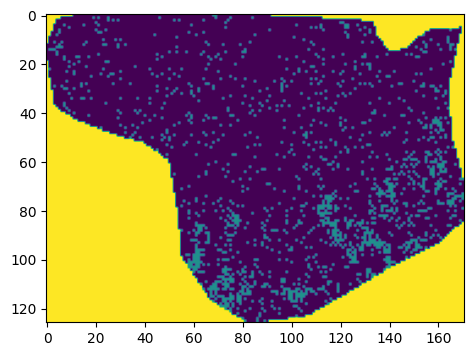

In [28]:
from pyimzml.ImzMLParser import ImzMLParser
from pyimzml.ImzMLParser import getionimage

hcc_cca = ImzMLParser('/content/drive/MyDrive/18ag_01666-20012022.imzML', include_spectra_metadata = None )
coord_mix_18 = enumerate(hcc_cca.coordinates)

(mz, spectrum0) = hcc_cca.getspectrum(0)
(mz, spectrum1) = hcc_cca.getspectrum(1)
Spec_Data = []
XCoord_mix_18 = []
YCoord_mix_18 = []
for i, (x,y,z) in coord_mix_18:
        (mz, spectrum) = hcc_cca.getspectrum(i)
        Spec_Data.append(spectrum)
        XCoord_mix_18.append(x)
        YCoord_mix_18.append(y)
image_mixed_18 = getionimage(hcc_cca, 1200, tol=0.1, z=1)
dimensions_18 = image_mixed_18.shape


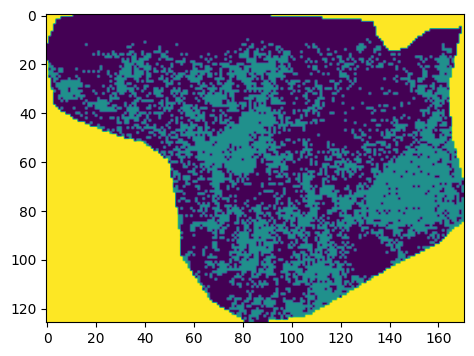

In [31]:
import numpy as np
predicted_18 = 2*np.ones(dimensions_18)
for i in range(0, len(pred_svm)):
    indx = XCoord_mix_18[i]-1
    indy = YCoord_mix_18[i]-1

    predicted_18[indy, indx] = pred_svm[i]

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 4))
plt.imshow(predicted_18)

In [11]:
# summarize all features
for i in range(0,1581):
  if rfe.support_[i] == True:
    print('Column: %d, Selected %s, Rank: %.3f' % (620+i, rfe.support_[i], rfe.ranking_[i]))

Column: 627, Selected True, Rank: 1.000
Column: 632, Selected True, Rank: 1.000
Column: 671, Selected True, Rank: 1.000
Column: 727, Selected True, Rank: 1.000
Column: 772, Selected True, Rank: 1.000
Column: 840, Selected True, Rank: 1.000
Column: 1005, Selected True, Rank: 1.000
Column: 1183, Selected True, Rank: 1.000
Column: 1208, Selected True, Rank: 1.000
Column: 1406, Selected True, Rank: 1.000
Column: 1530, Selected True, Rank: 1.000
Column: 1610, Selected True, Rank: 1.000
Column: 1642, Selected True, Rank: 1.000
Column: 1707, Selected True, Rank: 1.000
Column: 1731, Selected True, Rank: 1.000
Column: 1752, Selected True, Rank: 1.000
Column: 1810, Selected True, Rank: 1.000
Column: 1833, Selected True, Rank: 1.000
Column: 1930, Selected True, Rank: 1.000
Column: 2180, Selected True, Rank: 1.000
